In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
import experiments
from models import temperature, textmsg, influenza, cheating, bnn, walk, example

/usr/local/lib/python3.9/site-packages/jax/__init__.py:27: UserWarning: cloud_tpu_init failed: ConnectionError(MaxRetryError("HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/attributes/agent-worker-number (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x10b2a6ca0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))"))
 This a JAX bug; please report an issue at https://github.com/google/jax/issues
  _warn(f"cloud_tpu_init failed: {repr(exc)}\n This a JAX bug; please report "


In [3]:
save_file = True
run_bench = True

In [4]:
etas = [0.14, 0.06, 0.1, 0.18, 0.22]
# for fixed: use the fixed accuracy coefficient in etas
# for DSGD: use accuracy coefficient scheme eta_k = eta_0 * k ** (-0.5) for eta_4000 in etas

Estimator           eta                 Time (s)            ||final theta||_2   
Fixed               0.14                10.145271           19.9996337890625    
Fixed               0.06                9.11246             19.9996337890625    
Fixed               0.1                 8.982952            19.999635696411133  
Fixed               0.18                9.024036            19.9996337890625    
Fixed               0.22                9.14475             19.999635696411133  
DSGD                0.14                9.193985            19.999635696411133  
DSGD                0.06                10.38033            19.9996337890625    
DSGD                0.1                 9.431948            19.9996337890625    
DSGD                0.18                9.051045            19.999635696411133  
DSGD                0.22                9.225357            19.999635696411133  
Score               0.14                5.646965            19.967546463012695  
Reparam             0.14    

Estimator                Max iterations in 0.1 seconds
Fixed                    35031                    
DSGD                     35031                    
Score                    59781                    
Reparam                  47406                    
LYY18                    6219                     
Estimator   Cost        Avg(V(.))   V(|.|_2)    
Fixed       1.71e+00    2.84e-10    2.24e-09    
DSGD        1.71e+00    4.91e-11    2.54e-10    
Reparam     1.26e+00    1.47e-08    1.94e-08    
LYY18       9.61e+00    1.05e-06    4.04e-05    


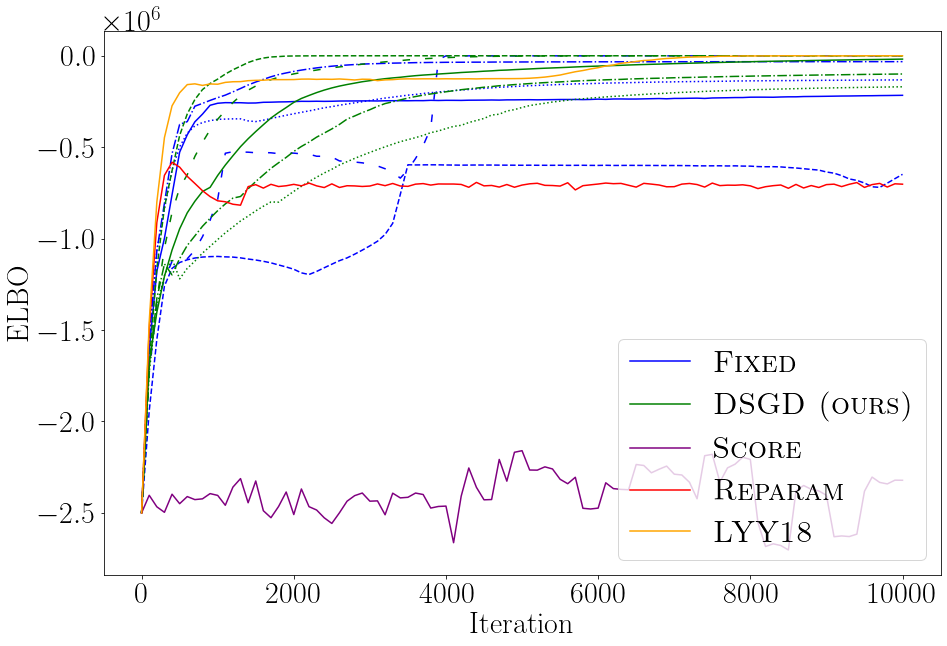

In [5]:
exprts1, bench1 = experiments.all_experiments(temperature.Temperature, save_file=save_file, run_bench=run_bench, etas=etas)

Estimator           eta                 Time (s)            ||final theta||_2   
Fixed               0.14                6.878657            1.7326533794403076  
Fixed               0.06                6.649082            0.976675271987915   
Fixed               0.1                 6.595599            0.9205058217048645  
Fixed               0.18                6.64608             1.4959938526153564  
Fixed               0.22                6.714164            1.5731897354125977  
DSGD                0.14                6.856667            2.4262938499450684  
DSGD                0.06                6.829846            2.0220553874969482  
DSGD                0.1                 6.814453            0.09378354251384735 
DSGD                0.18                7.233876            2.2943994998931885  
DSGD                0.22                6.795767            1.8796498775482178  
Score               0.14                5.075577            2.6519908905029297  


Reparam             0.14                4.576618            0.05084086209535599 
Skipping LYY18 estimator, not defined
Estimator                Max iterations in 0.1 seconds
Fixed                    33484                    
DSGD                     35031                    
Score                    58234                    
Reparam                  150000                   
Skipping LYY18 estimator, not defined
Estimator   Cost        Avg(V(.))   V(|.|_2)    
Fixed       1.74e+00    1.13e-02    5.05e-02    
DSGD        1.66e+00    7.66e-03    4.66e-02    
Reparam     3.88e-01    8.34e-09    2.62e-09    


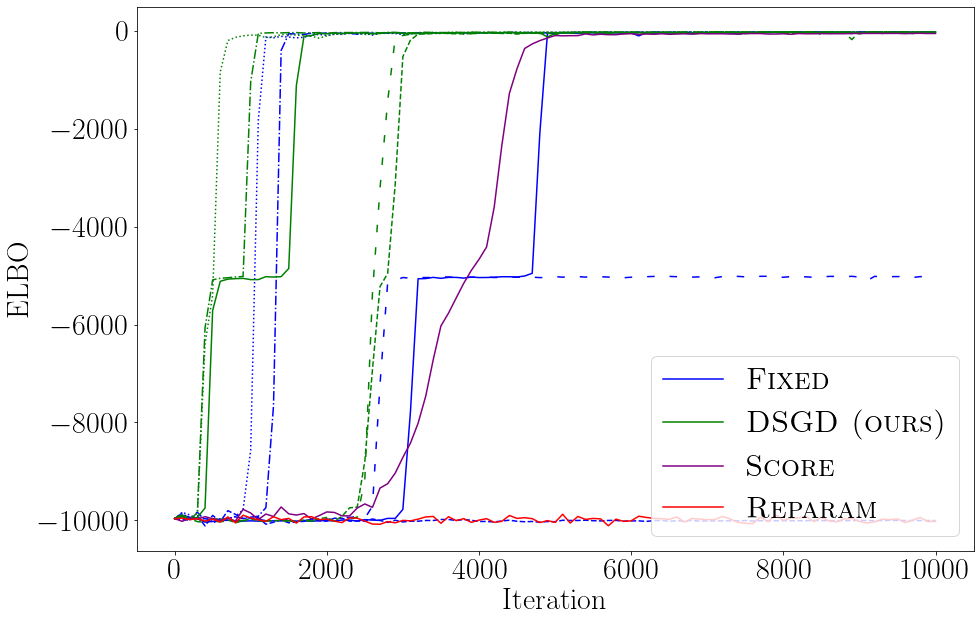

In [6]:
exprts2, bench2 = experiments.all_experiments(bnn.XORNet, save_file=save_file, run_bench=run_bench, step_size=0.01, etas=etas, eta_decay=0.2)

Estimator           eta                 Time (s)            ||final theta||_2   
Fixed               0.14                27.424914           3.6192445755004883  
Fixed               0.06                27.688505           3.5529258251190186  
Fixed               0.1                 27.180301           3.605027675628662   
Fixed               0.18                27.976921           3.6320769786834717  
Fixed               0.22                27.730664           3.6454732418060303  
DSGD                0.14                35.112951           3.8042263984680176  
DSGD                0.06                35.959784           3.6773085594177246  
DSGD                0.1                 35.481934           3.7286577224731445  
DSGD                0.18                36.254689           3.852970838546753   
DSGD                0.22                36.68102            3.8868539333343506  
Score               0.14                9.068432            3.4487688541412354  
Reparam             0.14    

LYY18               0.14                32.458115           3.5961813926696777  
Estimator                Max iterations in 0.1 seconds
Fixed                    31937                    
DSGD                     31937                    
Score                    150000                   
Reparam                  69062                    
LYY18                    31163                    
Estimator   Cost        Avg(V(.))   V(|.|_2)    
Fixed       4.70e+00    9.50e-01    1.49e+00    
DSGD        4.70e+00    1.71e-01    2.61e-01    
Reparam     2.17e+00    8.63e-10    7.01e-10    
LYY18       4.81e+00    7.92e+00    1.26e+01    


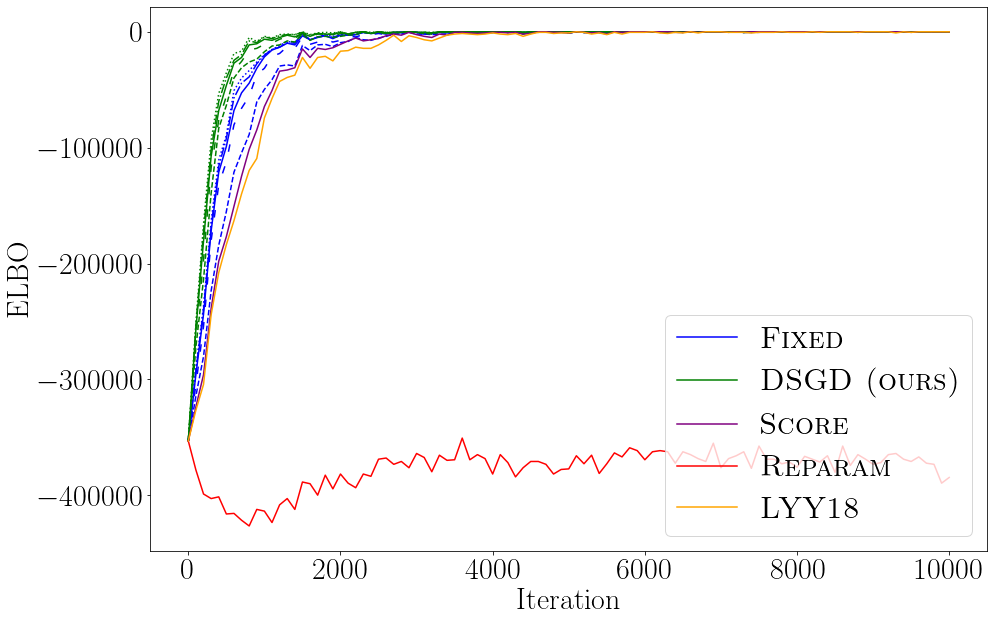

In [7]:
exprts3, bench3 = experiments.all_experiments(walk.Walk, save_file=save_file, run_bench=run_bench, etas=etas)

Estimator           eta                 Time (s)            ||final theta||_2   
Fixed               0.14                12.688765           1.0367283821105957  
Fixed               0.06                12.340967           1.0072227716445923  
Fixed               0.1                 11.723127           1.019258975982666   
Fixed               0.18                12.012165           1.0587254762649536  
Fixed               0.22                11.741136           1.0848798751831055  
DSGD                0.14                12.246883           1.015661597251892   
DSGD                0.06                12.097137           1.003582239151001   
DSGD                0.1                 12.284222           1.008196234703064   
DSGD                0.18                12.103068           1.0255022048950195  
DSGD                0.22                13.970172           1.0373666286468506  
Score               0.14                9.868046            1.3784114122390747  
Reparam             0.14    

LYY18               0.14                23.361671           0.9940049648284912  
Estimator                Max iterations in 0.1 seconds
Fixed                    14921                    
DSGD                     14921                    
Score                    22656                    
Reparam                  24203                    
LYY18                    8734                     
Estimator   Cost        Avg(V(.))   V(|.|_2)    
Fixed       1.52e+00    2.84e-03    4.64e-03    
DSGD        1.52e+00    2.31e-03    3.51e-03    
Reparam     9.36e-01    4.14e-19    1.16e-18    
LYY18       2.59e+00    4.27e-02    1.09e-01    


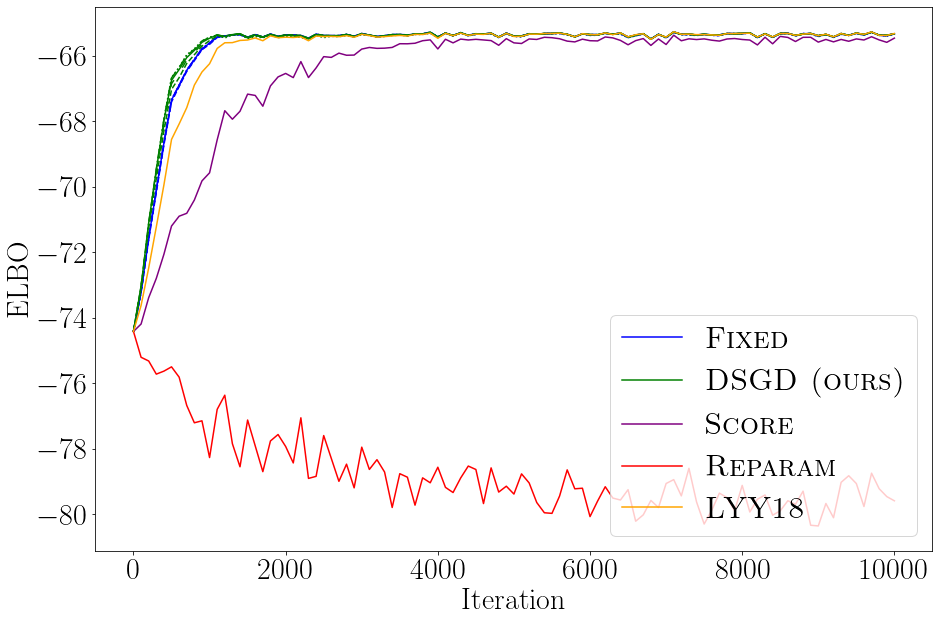

In [8]:
exprts4, bench4 = experiments.all_experiments(cheating.Cheating, save_file=save_file, run_bench=run_bench, etas=etas)

Estimator           eta                 Time (s)            ||final theta||_2   
Fixed               0.14                5.268704            3.150066375732422   
Fixed               0.06                4.957658            3.0962448120117188  
Fixed               0.1                 5.013438            3.1182758808135986  
Fixed               0.18                4.942214            3.1566951274871826  
Fixed               0.22                5.014064            3.15678071975708    
DSGD                0.14                5.016112            3.157101631164551   
DSGD                0.06                5.048331            3.091470956802368   
DSGD                0.1                 5.024879            3.1420819759368896  
DSGD                0.18                5.008211            3.159976005554199   
DSGD                0.22                5.332666            3.16156268119812    
Score               0.14                4.399116            3.020007848739624   
Reparam             0.14    

LYY18               0.14                11.420764           3.0773322582244873  
Estimator                Max iterations in 0.1 seconds
Fixed                    243750                   
DSGD                     237500                   
Score                    437500                   
Reparam                  350000                   
LYY18                    96906                    
Estimator   Cost        Avg(V(.))   V(|.|_2)    
Fixed       1.79e+00    1.08e-02    2.14e-02    
DSGD        1.84e+00    7.89e-03    1.53e-02    
Reparam     1.25e+00    7.99e-03    1.53e-02    
LYY18       4.51e+00    3.42e-02    6.00e-02    


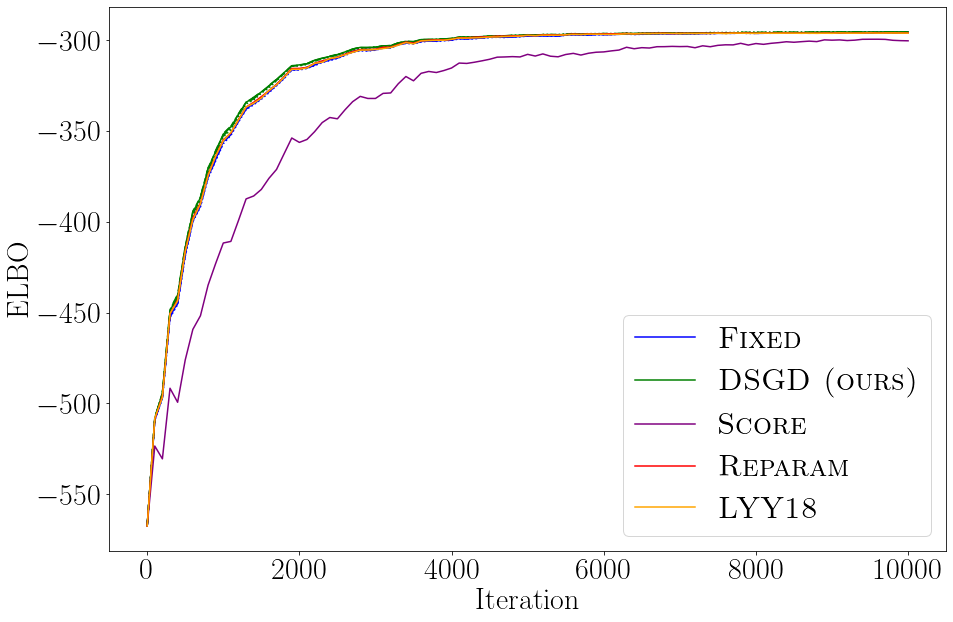

In [9]:
exprts5, bench5 = experiments.all_experiments(textmsg.TextMsg, save_file=save_file, run_bench=run_bench, etas=etas)

Estimator           eta                 Time (s)            ||final theta||_2   
Fixed               0.14                9.300531            0.534690260887146   
Fixed               0.06                8.948641            0.4734099805355072  
Fixed               0.1                 9.071782            0.5042779445648193  
Fixed               0.18                9.434126            0.5669692158699036  
Fixed               0.22                10.048956           0.5979208946228027  
DSGD                0.14                8.933372            0.6056682467460632  
DSGD                0.06                8.856086            0.5497888326644897  
DSGD                0.1                 9.264532            0.5851411819458008  
DSGD                0.18                8.872803            0.6256231665611267  
DSGD                0.22                8.815647            0.6462631821632385  
Score               0.14                6.427157            0.007080500479787588
Reparam             0.14    

LYY18               0.14                20.74254            0.6384661793708801  
Estimator                Max iterations in 0.1 seconds
Fixed                    48953                    
DSGD                     48953                    
Score                    62875                    
Reparam                  52046                    
LYY18                    7573                     
Estimator   Cost        Avg(V(.))   V(|.|_2)    
Fixed       1.28e+00    7.92e-03    3.97e-03    
DSGD        1.28e+00    7.77e-03    3.94e-03    
Reparam     1.21e+00    7.60e-03    3.75e-03    
LYY18       8.30e+00    5.80e-02    2.88e-02    


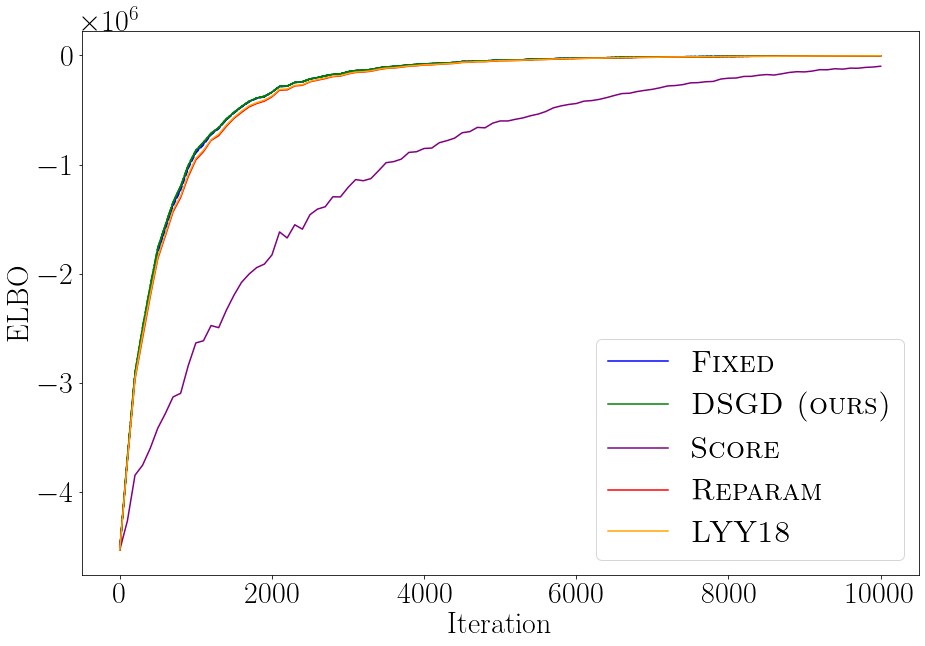

In [10]:
exprts6, bench6 = experiments.all_experiments(influenza.Influenza, save_file=save_file, run_bench=run_bench, etas=etas)